In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder

In [5]:
# Load dataset
data = pd.read_csv("Customer Conversion Prediction - Customer Conversion Prediction.csv") #comma separated values
data

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


In [3]:
data.info() #NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [85]:
data.call_type.value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: call_type, dtype: int64

In [76]:
# Perform One-Hot Encoding on the categorical features
ohe = OneHotEncoder(sparse=False, drop='first')
cat_features = ['job', 'marital', 'call_type', 'prev_outcome','education_qual']
ohe_data = pd.DataFrame(ohe.fit_transform(data[cat_features]))
ohe_data.columns = ohe.get_feature_names(cat_features)

# Replace the categorical features with the encoded features
data = data.drop(cat_features, axis=1)
data = pd.concat([data, ohe_data], axis=1)

c:\Users\WARRIOR\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [77]:
import joblib
# Save the OneHotEncoder to a file
joblib.dump(ohe, 'ohe.pkl')

['ohe.pkl']

In [78]:
data.head()

,age,day,mon,dur,num_calls,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,marital_married,marital_single,call_type_telephone,call_type_unknown,prev_outcome_other,prev_outcome_success,prev_outcome_unknown,education_qual_secondary,education_qual_tertiary,education_qual_unknown
0,58,5,may,261,1,no,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,44,5,may,151,1,no,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,33,5,may,76,1,no,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3,47,5,may,92,1,no,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,33,5,may,198,1,no,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       45211 non-null  int64  
 1   day                       45211 non-null  int64  
 2   mon                       45211 non-null  object 
 3   dur                       45211 non-null  int64  
 4   num_calls                 45211 non-null  int64  
 5   y                         45211 non-null  object 
 6   job_blue-collar           45211 non-null  float64
 7   job_entrepreneur          45211 non-null  float64
 8   job_housemaid             45211 non-null  float64
 9   job_management            45211 non-null  float64
 10  job_retired               45211 non-null  float64
 11  job_self-employed         45211 non-null  float64
 12  job_services              45211 non-null  float64
 13  job_student               45211 non-null  float64
 14  job_te

In [80]:
data.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [81]:
# Resample the "yes" class to balance the classes
yes = data[data['y'] == 'yes']
no = data[data['y'] == 'no']
yes_resampled = resample(yes, replace=True, n_samples=len(no), random_state=42)
data = pd.concat([yes_resampled, no])

In [82]:
data=data.drop(['mon','day'],axis =1)
data.columns

Index(['age', 'dur', 'num_calls', 'y', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single',
       'call_type_telephone', 'call_type_unknown', 'prev_outcome_other',
       'prev_outcome_success', 'prev_outcome_unknown',
       'education_qual_secondary', 'education_qual_tertiary',
       'education_qual_unknown'],
      dtype='object')

In [51]:
le = LabelEncoder()
data['y'] = le.fit_transform(data['y'])

<AxesSubplot: >

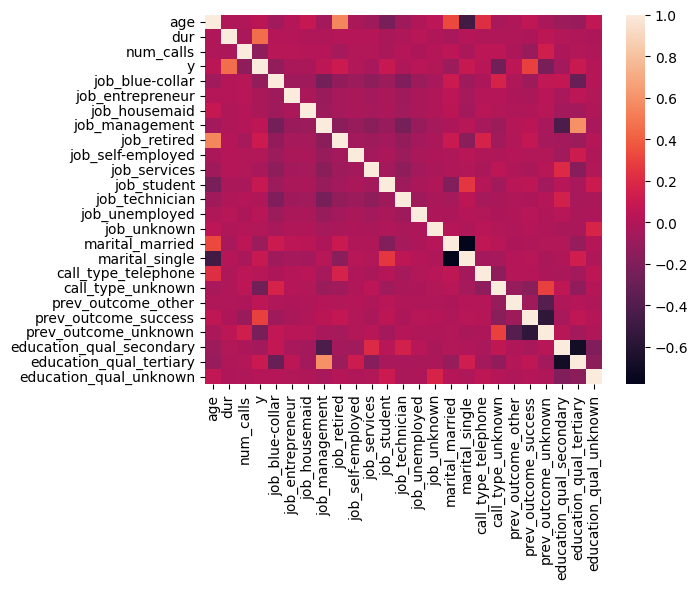

In [55]:
import seaborn as sns
sns.heatmap(data.corr())

In [56]:
X = data.drop('y', axis=1)
y = data['y']

In [57]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.optimizers import Adam

# define the model architecture
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Define the optimizer
opt = Adam(learning_rate=0.0001)

# compile the model
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/50
1997/1997 [==============================] - 5s 2ms/step - loss: 1.7251 - accuracy: 0.5994 - val_loss: 0.6082 - val_accuracy: 0.7096
Epoch 2/50
1997/1997 [==============================] - 5s 2ms/step - loss: 0.6556 - accuracy: 0.6497 - val_loss: 0.5746 - val_accuracy: 0.7196
Epoch 3/50
1997/1997 [==============================] - 5s 2ms/step - loss: 0.5907 - accuracy: 0.6840 - val_loss: 0.5656 - val_accuracy: 0.7175
Epoch 4/50
1997/1997 [==============================] - 5s 2ms/step - loss: 0.5692 - accuracy: 0.7013 - val_loss: 0.5556 - val_accuracy: 0.7212
Epoch 5/50
1997/1997 [==============================] - 5s 2ms/step - loss: 0.5575 - accuracy: 0.7121 - val_loss: 0.5415 - val_accuracy: 0.7256
Epoch 6/50
1997/1997 [==============================] - 5s 2ms/step - loss: 0.5461 - accuracy: 0.7181 - val_loss: 0.5371 - val_accuracy: 0.7278
Epoch 7/50
1997/1997 [==============================] - 5s 2ms/step - loss: 0.5357 - accuracy: 0.7267 - val_loss: 0.5234 - val_accuracy:

In [63]:
test_loss, test_acc = model.evaluate(X_val, y_val)
print('Test accuracy:', test_acc)

500/500 [==============================] - 1s 1ms/step - loss: 0.4152 - accuracy: 0.8085
Test accuracy: 0.8085039854049683


In [64]:
model.save('my_model.h5')
